# Zcash Turnstile
A [Noncesense Research Lab](http://www.noncesense.org) study by [Isthmus](https://www.github.com/mitchellpkt) (Mitchell Krawiec-Thayer, Ph.D.)

Modeling ZIP 308 ([Proposal](https://github.com/zcash/zips/pull/197), [Discussion](https://github.com/zcash/zips/pull/197))

```
The amount to send in each transaction is chosen according to the 
following distribution:

1. Choose an integer exponent uniformly in the range 6 to 9 inclusive.
2. Choose an integer mantissa uniformly in the range 1 to 99 inclusive.
3. Calculate amount := (mantissa * 10:sup:`exponent`) zatoshi.
4. If amount is greater than the amount remaining to send, repeat from step 1.
```

## Set Parameters

In [1]:
numSamples = 1000000 # How many samples
numBins = 500

gold = (244/256, 183/256, 40/256)
gray = (76/256,76/256,76/256)

## Import libraries

In [2]:
import random as random
import matplotlib.pyplot as plt
import numpy as np
from pylab import subplot
plt.rcParams.update({'font.size': 15})

In [3]:
%matplotlib inline


## Define functions

In [4]:
# Simulate picking turnstile transaction values 
def sampleDenominations(numSamples, maxExponent=9):
    denominationPicks = []
    for i in range(maxExponent, numSamples):
        exponent = random.randint(6,maxExponent)
        mantissa = random.randint(1,99)
        value = mantissa*10**exponent
        denominationPicks.append(value/10**8)
    return denominationPicks

In [5]:
# Plot the distributions from the simulation
def plotPicks(denominationPicks, maxExponent):
    maxVal = max(denominationPicks)
    
    plt.figure(figsize=(12,12),facecolor='white')

    ax1=subplot(2,1,1)
    plt.hist(denominationPicks, density=1, bins=numBins, color=gray)
    ax1.set_facecolor(gold)
    plt.title('Amount distribution from ZIP 308 with exponents on (6,'+str(maxExponent)+'). Note, log y')
    plt.yscale('log')
    plt.ylabel('Probability');
    plt.xlabel('Amount in ZEC');
    plt.xlim((0,maxVal))
    yl = plt.ylim()
    xl = plt.xlim()
    plt.text(xl[0], 0.8*yl[1],"   Mitchell ~ Isthmus@Noncesense.org")


    ax2=subplot(2,1,2)
    log_bins = 10 ** np.linspace(np.log10(1), np.log10(maxVal), numBins)
    ax2.set_facecolor(gold)
    plt.hist(denominationPicks, density=1, bins=log_bins, color=gray)
    plt.title('Amount distribution from ZIP 308 with exponents on (6,'+str(maxExponent)+'). Note, log y')
    plt.ylabel('Probability');
    plt.xlabel('Amount in ZEC');
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim((0.1,maxVal))
    yl = plt.ylim()
    xl = plt.xlim()
    plt.text(xl[0], 0.75*yl[1],"   Mitchell ~ Isthmus@Noncesense.org")

## Results

### ZIP 308 v1
Written at top, samples exponent on [6,9]

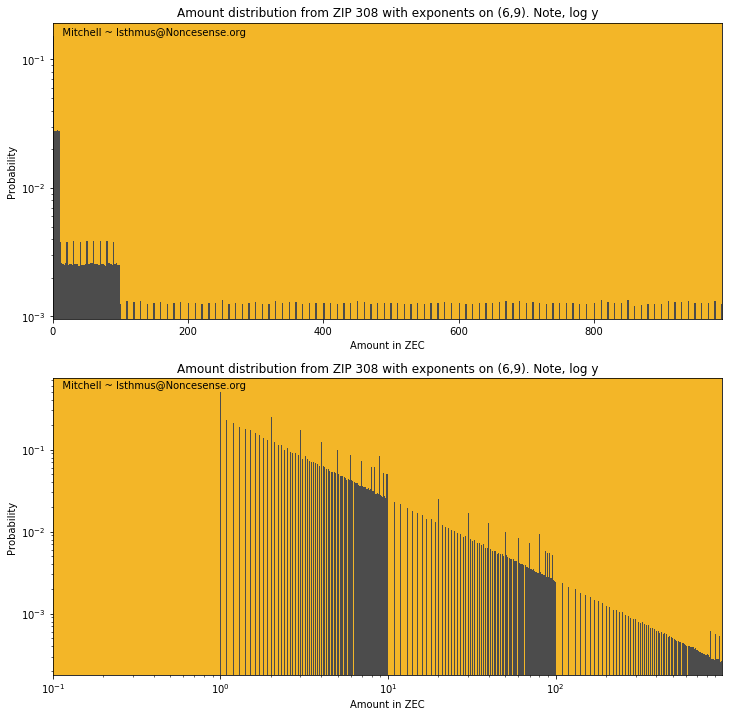

In [6]:
maxExponent = 9
ZIP308v1Picks = sampleDenominations(numSamples, maxExponent)
plotPicks(ZIP308v1Picks, maxExponent)

### ZIP 308 v2
Samples exponent on [6,8], reducing maximum value to just under 100 ZEC

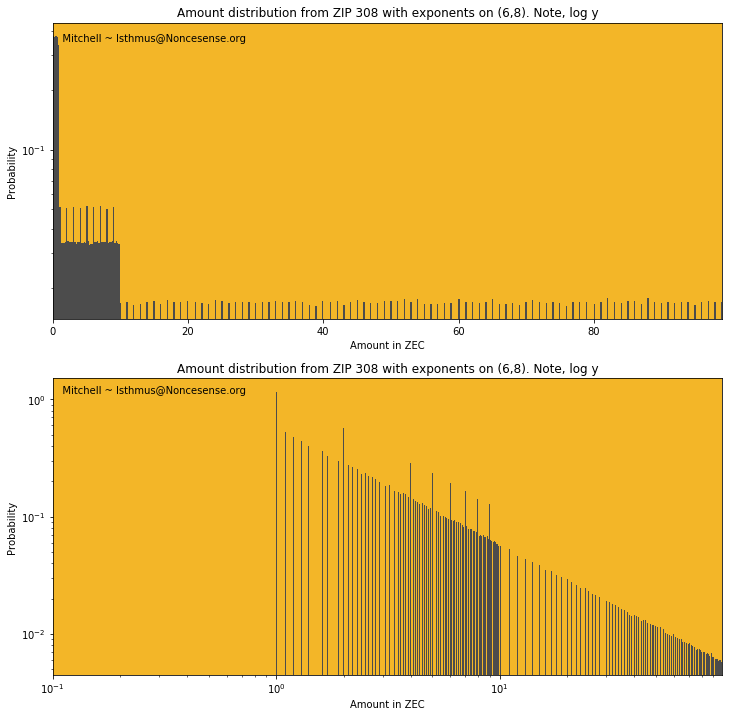

In [7]:
maxExponent = 8
ZIP308v2Picks = sampleDenominations(numSamples, maxExponent)
plotPicks(ZIP308v2Picks, maxExponent)

## Notes

I'm trying to understand why a function was chosen that has this kind of structure in the probability distribution function. I don't yet see why it would helps, and I have a hunch that that function is not quite optimal

One could achieve some privacy by using a straghtforward continuous PDF (picture bottom plot with that triangle filled in)

Alternately, one could use discrete denominations, e.g. 0.001 ZEC, 0.005 ZEC, etc and that would offer privacy from a different angle

The current algorithm  effectively produces a compromise between the two options. It's not clear to me whether they interfere constructively or destructively, with respect to privacy.

I'm still thinking through the optimal properties of the turnstile PDF, with respects to statistical heuristic resistance.